# Word Cloud for all Gender Pay Gap related Tweets

Data - https://github.com/paygaphack/mentors-repo/tree/master/twitter_scraper/pay_gap_data

In [1]:
import pandas as pd     # data manipulation
import numpy as np     

import json   # parse json files
import re     # regex

from wordcloud import WordCloud, STOPWORDS  # draw wordcloud

import matplotlib.pyplot as plt # plotting
% matplotlib inline


from vaderSentiment_master.vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer #sentiment analysis




# We will display plots right inside Jupyter Notebook
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

# Increase the default plot size
from pylab import rcParams
rcParams['figure.figsize'] = 5, 4


In [2]:
def parse_json(file):
    with open(file, 'r') as f:
        temp = json.load(f)
        
    timestamp = []
    tweet = []
    username = []
    
    for var in temp:
        timestamp.append(var['timestamp'])
        tweet.append(var['tweet'])
        username.append(var['username'])
    
    d = {'timestamp': timestamp, 'username': username, 'tweet':tweet}
    data = pd.DataFrame(data=d)
    
    return data

In [3]:
mar_data = parse_json('Paygap_tweet/pay_gap_mar.json')
jun_data = parse_json('Paygap_tweet/pay_gap_jun.json')
jan_data = parse_json('Paygap_tweet/pay_gap_jan.json')
apr_data = parse_json('Paygap_tweet/pay_gap_apr.json')
may_data = parse_json('Paygap_tweet/pay_gap_may.json')
feb_data = parse_json('Paygap_tweet/pay_gap_feb.json')
dec_data = parse_json('Paygap_tweet/pay_gap_dec.json')

In [4]:
data = pd.concat([apr_data, may_data, mar_data, jun_data, jan_data, feb_data, dec_data], ignore_index=True)

In [5]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
df = data.copy()
df1 = data.copy()

# Data Cleaning

In [7]:
def remove_usernames(df):
    df.loc[:, "tweet"].replace(re.compile(r"@[^\s]+[\s]?"), "", inplace=True)
        


In [8]:
def remove_special_chars(df):  
        for remove in map(lambda r: re.compile(re.escape(r)), [",", ":", "\"", "=", "&", ";", "%", "$",
                                                                     "@", "%", "^", "*", "(", ")", "{", "}",
                                                                     "[", "]", "|", "/", "\\", ">", "<", "-",
                                                                     "!", "?", ".", "'",
                                                                     "--", "---", "#"]):
            df.loc[:, "tweet"].replace(remove, "", inplace=True)

In [9]:
def remove_hashtags(df):  
        for remove in map(lambda r: re.compile(re.escape(r)), ["#"]):
            df.loc[:, "tweet"].replace(remove, "", inplace=True)

In [10]:
def remove_url(df):
    #df.loc[:, "tweet"].replace(re.compile(r"http:// "), "http://", inplace=True)
    df.loc[:, "tweet"].replace(re.compile(r"http.?://[^\s]+[\s]?"), "", inplace=True)

In [11]:
def reduce_chars(df):
    df.loc[:, "tweet"].replace(re.compile(r'!{3,}'), "!", inplace=True)
    df.loc[:, "tweet"].replace(re.compile(r'\?{3,}'), "?", inplace=True)
    df.loc[:, "tweet"].replace(re.compile(r'\.{2,}'), ".", inplace=True)

In [12]:
def remove_pic_url(df):
    df.loc[:, "tweet"].replace(re.compile(r'(pic\.twitter\.com/).{10}'), "", inplace=True)

In [ ]:
remove_usernames(df)
remove_url(df)
remove_pic_url(df)
remove_special_chars(df)
df['tweet'] = df['tweet'].str.lower()

# Generate the Word Cloud

In [ ]:
text = " ".join(tweet for tweet in df.tweet)

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(['paygap', 'pay', 'gap', 'gender', 'via', 'genderpaygap', 'women', 'woman', 'man', 'will', 'still', 'much', 'men', 'female', 'male', 'take', 'equalpay', 'see', 'one', 'https','say','let','dont','well'])

wordcloud = WordCloud(stopwords=stopwords, background_color="white", min_font_size=6, colormap='Dark2',max_font_size=35).generate(text)

#wordcloud.to_file("paygap_wordcloud.png")

In [ ]:
plt.figure(figsize=(13,23))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#colors: https://matplotlib.org/users/colormaps.html

# Sentiment Analysis

In [13]:
remove_usernames(df1)
remove_url(df1)
remove_pic_url(df1)
remove_hashtags(df1)
reduce_chars(df1)

In [14]:
analyser = SentimentIntensityAnalyzer()

In [15]:
score = analyser.polarity_scores("I am very happy")

In [16]:
print(score)

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}


In [17]:
def get_compound_score(str):
    score = analyser.polarity_scores(str)
    return score['compound']
    

In [18]:
df1['score'] = df1['tweet'].apply(get_compound_score)


In [20]:
df1.dtypes

timestamp    datetime64[ns]
username             object
tweet                object
score               float64
dtype: object

In [21]:
df1['sentiment'] = 0

pos_mask = df1['score'] >= 0.5
neg_mask = df1['score'] <= -0.5
neu_mask = (df1['score'] > -0.5) & (df1['score'] < 0.5)
            
            
df1.loc[pos_mask, 'sentiment'] = 'positive'
df1.loc[neg_mask, 'sentiment'] = 'negative'
df1.loc[neu_mask, 'sentiment'] = 'neutral'

Text(0,0.5,'No. of Tweets')

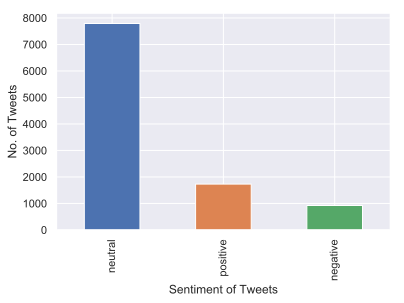

In [31]:
df1['sentiment'].value_counts().plot('bar')
plt.xlabel('Sentiment of Tweets')
plt.ylabel('No. of Tweets')

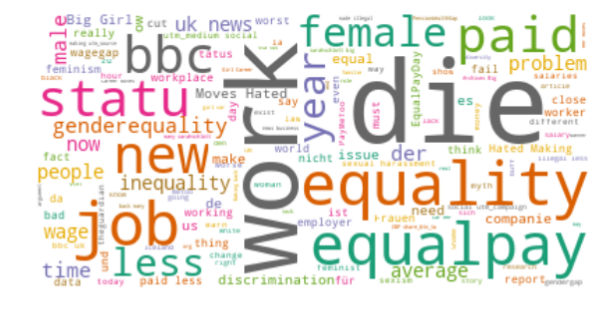

In [24]:
pos_text = " ".join(tweet for tweet in df1[df1['sentiment'] == 'negative'].tweet)

stopwords = set(STOPWORDS)
stopwords.update(['paygap', 'pay', 'gap', 'gender', 'via', 'genderpaygap', 'will', 'men', 'man', 'women',
                  'still', 'much', 'gapsquare','take', 'bitly','bit','ly','co', 'see', 'one', 'https','html', 'twitter'])

wordcloud = WordCloud(stopwords=stopwords, background_color="white", colormap='Dark2').generate(pos_text)

#wordcloud.to_file("paygap_wordcloud.png")

plt.figure(figsize=(10,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

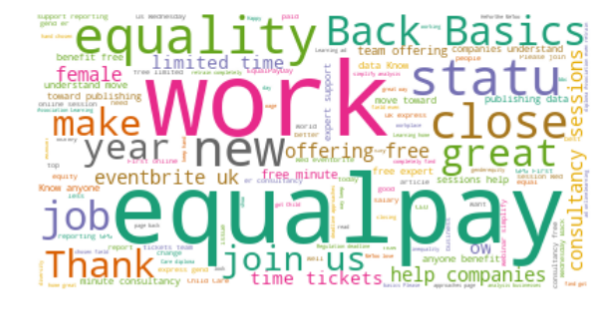

In [25]:
pos_text = " ".join(tweet for tweet in df1[df1['sentiment'] == 'positive'].tweet)

stopwords = set(STOPWORDS)
stopwords.update(['paygap', 'pay', 'gap', 'gender', 'via', 'genderpaygap', 'will', 'men', 'man', 'women',
                  'still', 'much', 'gapsquare','take', 'bitly','bit','ly','co', 'see', 'one', 'https','html', 'twitter'])

wordcloud = WordCloud(stopwords=stopwords, background_color="white", colormap='Dark2').generate(pos_text)

#wordcloud.to_file("paygap_wordcloud.png")

plt.figure(figsize=(10,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [26]:
df1['timestamp1'] = df1.timestamp.map(lambda x: x.strftime('%Y-%m'))
df1['count'] = 1

In [27]:
df2 = df1.groupby(['timestamp1','sentiment'])['count'].sum().reset_index()
df3 = df2.pivot(index='timestamp1', columns='sentiment', values='count')

In [28]:
# sns.set_palette("RdBu", 1)
# fig, ax = plt.subplots(figsize=(8,5))
# sns.barplot(x='timestamp1', y='count', hue='sentiment', data=df2)
# plt.ylabel('No. of Tweets')
# plt.xlabel('Date')


#Equal Pay Day apr 2018
#UK Laws Apr 2018
#iceland dec17-jan18

In [29]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import cufflinks as cf
import plotly.plotly as py
# Initialize plotly
cf.go_offline() # required to use plotly offline
cf.set_config_file(offline=False, world_readable=True)
init_notebook_mode(connected=True)


df3.iplot(kind="line", theme="white", xTitle='Date', yTitle='No. of Tweets')

In [ ]:
# VADER (Valence Aware Dictionary for sEntiment Reasoning)
# - relies on lexical features 
# - each word has a score (-4 to +4), the sentence has its score from -1 to 1
# - used for social media
# - Amazon Mechanical Turk
# - punctuation, capitalisation, conjunctions, degree modifiers, tri-grams to catch negation
# - no training data reqd